<h2>Grafiikkaa seaborn-kirjaston avulla</h2>

Seaborn on matplotlib-kirjaston päälle rakennettu kirjasto, joka tarjoaa "helppoja" ratkaisuja.
Seabornilla luotuja kaaviota voin muotoilla matplotlib-komennoilla.

Huomaa, että seaborn tekee kuviot ilman että minun täytyy laskea lukumääräyhteenvetoja tai keskiarvoja.

Usein seabornissa käytettyjä parametreja: <b>x</b>, <b>y</b>, <b>hue</b> ja <b>data</b>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#käytän 'ggplot'-tyyliä
plt.style.use('ggplot')

In [2]:
#seaborn-kirjastossa on joitain valmiita esimerkkidatoja
#lataan titanic-aineiston, joka sisältää tietoja Titanicin matkustajista
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h3>Countplot</h3>

<b>Countplot</b> on nopea tapa lukumäärien esittämiseen.

Text(0, 0.5, 'lukumäärä')

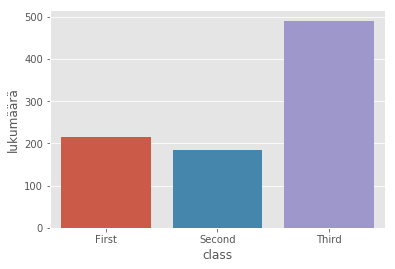

In [3]:
#mtkustajien lukumäärät hyttiluokittain
ax1 = sns.countplot(x='class', data=titanic)

#voin käyttää matplotlibin muotoilukomentoja
ax1.set_ylabel('lukumäärä')

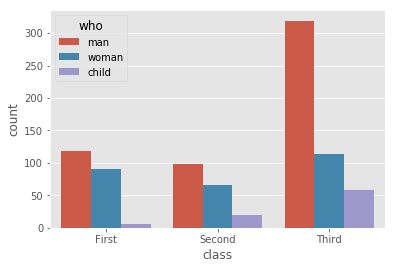

In [4]:
#matkustajan sukupuoli (mies, nainen, lapsi) hyttiluokittain:
sns.countplot(x='class', hue='who', data=titanic)

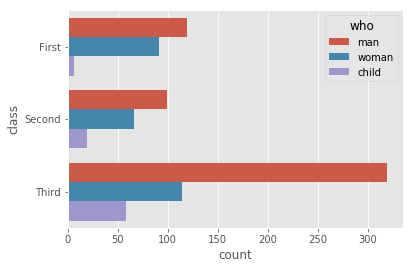

In [5]:
#edellinen vaakapylväinä
sns.countplot(y='class', hue='who', data=titanic)

<h3>Catplot</h3>

<b>Catplot</b> tekee erillisen kaavion jokaiselle tautamuuttujan arvolle.

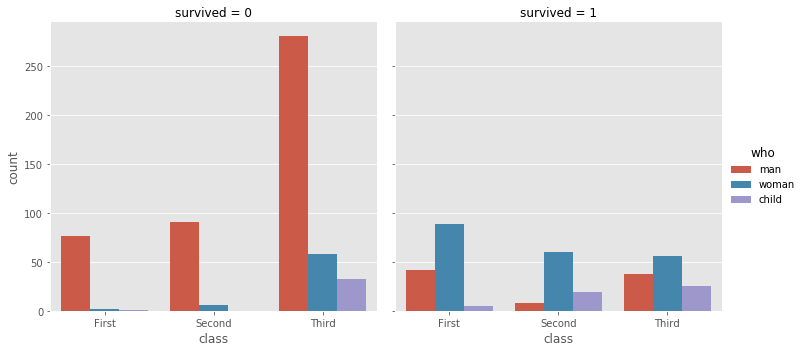

In [6]:
sns.catplot(x='class', hue='who', col='survived', data=titanic, kind='count')

<h3>Barplot</h3>

Barplot esittää keskiarvot ja keskiarvojen virhemarginaalit.

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

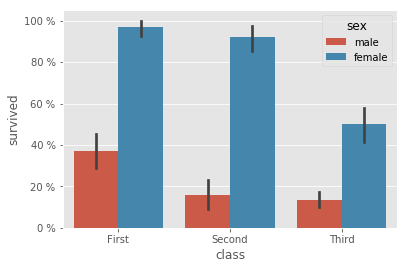

In [7]:
#seuraavassa esitän selvinneiden prosenttiosuuden hyttiluokan ja sukupuolen mukaan
#huom: survived-muuttujan keskiarvo on sama kuin selvinneiden prosenttiosuus.
ax2 = sns.barplot(x='class', y='survived', hue='sex', data=titanic)

ax2.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax2.get_yticks()])

In [8]:
#lataan tips-datan, joka sisältää tietoja ravintolaseurueista
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


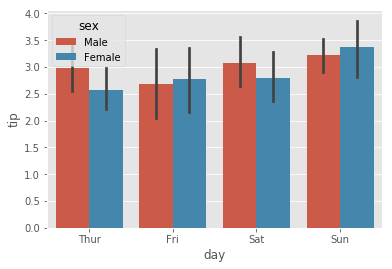

In [9]:
#juomarahan suuruus (keskiarvo) sukupuolen mukaan eri viikonpäivinä
sns.barplot(x='day', y='tip', hue='sex', data=tips)

[Text(0, 0, '0 %'),
 Text(0, 0, '2 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '8 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '12 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '18 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '22 %')]

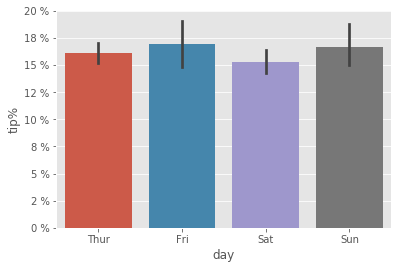

In [10]:
#juomaraha prosentteina laskusta
tips['tip%'] = tips['tip']/(tips['total_bill'])

#juomarahan osuus (keskiarvo) eri viikonpäivinä
ax3 = sns.barplot(x='day', y='tip%', data=tips)

ax3.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax3.get_yticks()])

In [11]:
#avaan Excel-datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [12]:
#poimin datasta ainostaan tyytyväisyysmuuttujat
df1=df[['johto', 'työtov', 'työymp', 'palkkat', 'työteht']]
df1.head()

,johto,työtov,työymp,palkkat,työteht
0,3,3.0,3,3,3
1,1,5.0,2,1,3
2,3,4.0,1,1,3
3,3,3.0,3,3,3
4,2,3.0,2,1,2


[Text(0, 0, 'työtovereihin'),
 Text(0, 0, 'työtehtäviin'),
 Text(0, 0, 'työympäristöön'),
 Text(0, 0, 'johtoon'),
 Text(0, 0, 'palkkaan')]

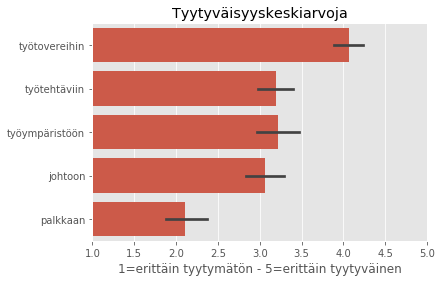

In [13]:
#esitän tyytyväisyyskeskiarvot
ax4 = sns.barplot(data=df1, orient='h', color='C0', 
                 order=['työtov','työteht','työymp','johto','palkkat'])

#skaalaan asteikon mielipideasteikon mukaiseksi
ax4.set_xlim(1, 5)

ax4.set_title('Tyytyväisyyskeskiarvoja')
ax4.set_xlabel('1=erittäin tyytymätön - 5=erittäin tyytyväinen')
ax4.set_yticklabels(['työtovereihin','työtehtäviin','työympäristöön','johtoon','palkkaan'])